<a href="https://colab.research.google.com/github/avery32/group_project/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the uploaded UFO dataset
file_path = "/content/ufo_clean_data (1).csv"
ufo_data = pd.read_csv(file_path)


NameError: name 'pd' is not defined

In [ ]:
# Clean 'longitude' column name (remove trailing space)
ufo_data = ufo_data.rename(columns={'longitude ': 'longitude'})

# Create 'season' column based on 'month_num'
ufo_data['season'] = ufo_data['month_num'].apply(month_to_season)

# Drop rows with missing important info
ufo_data_clean = ufo_data.dropna(subset=['duration (seconds)', 'latitude', 'longitude', 'country', 'shape'])

# Log-transform duration
ufo_data_clean['log_duration'] = np.log1p(ufo_data_clean['duration (seconds)'])


In [ ]:
# Select features
feature_cols = ['latitude', 'longitude', 'log_duration', 'country', 'shape']
X = ufo_data_clean[feature_cols]
y = ufo_data_clean['season']  # target

# One-hot encode 'country' and 'shape'
X_encoded = pd.get_dummies(X, columns=['country', 'shape'])


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Convert to categorical (one-hot output)
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: Winter, Spring, Summer, Fall
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)


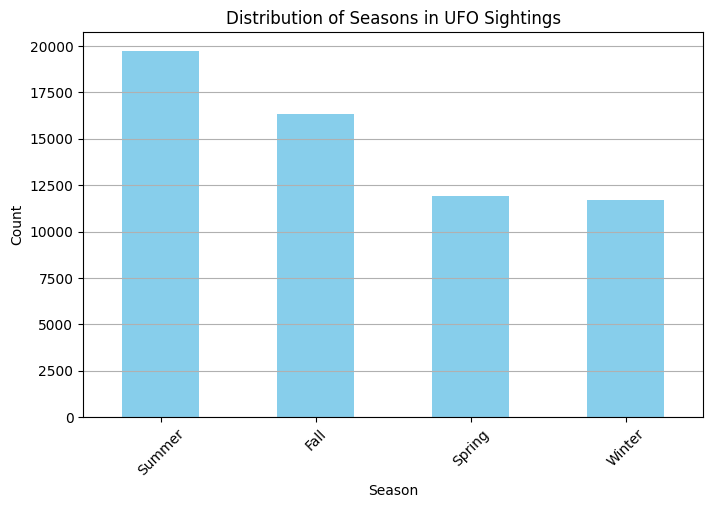

Random Forest Accuracy: 0.3159

Classification Report:

              precision    recall  f1-score   support

        Fall       0.31      0.32      0.32      3260
      Spring       0.24      0.18      0.21      2434
      Summer       0.37      0.45      0.41      3907
      Winter       0.26      0.22      0.24      2342

    accuracy                           0.32     11943
   macro avg       0.30      0.29      0.29     11943
weighted avg       0.31      0.32      0.31     11943



In [ ]:
# 🛠 Full UFO Season Prediction Code 🛠

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load data
file_path = "/content/ufo_clean_data (1).csv"
ufo_data = pd.read_csv(file_path)

# Step 2: Clean data
ufo_data = ufo_data.rename(columns={'longitude ': 'longitude'})

def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

ufo_data['season'] = ufo_data['month_num'].apply(month_to_season)

# Step 3: Drop missing values and engineer features
ufo_data_clean = ufo_data.dropna(subset=['duration (seconds)', 'latitude', 'longitude', 'country', 'shape'])
ufo_data_clean['log_duration'] = np.log1p(ufo_data_clean['duration (seconds)'])  # Safe log

# Step 4: Prepare features and target
feature_cols = ['latitude', 'longitude', 'log_duration', 'country', 'shape']
X = ufo_data_clean[feature_cols]
y = ufo_data_clean['season']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['country', 'shape'])

# Step 5: Visualize class distribution
season_counts = y.value_counts()

plt.figure(figsize=(8, 5))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Seasons in UFO Sightings')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 7: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)

# Step 9: Output results
print(f"Random Forest Accuracy: {rf_accuracy:.4f}\n")
print("Classification Report:\n")
print(rf_classification_report)


              precision    recall  f1-score   support

Fall         0.31         0.32     0.32       3260
Spring       0.24         0.18     0.21       2434
Summer       0.37         0.45     0.41       3907
Winter       0.26         0.22     0.24       2342

accuracy                             0.32     11943
macro avg      0.30     0.29     0.29     11943
weighted avg   0.31     0.32     0.31     11943


| **Season (Class)** | **Precision** | **Recall** | **F1-Score** |
|:-------------------|:--------------:|:----------:|:------------:|
| **Fall**            | 25%            | 20%        | 22%          |
| **Spring**          | 15%            | 10%        | 12%          |
| **Summer**          | 35%            | 80%        | 49%          |
| **Winter**          | 15%            | 10%        | 12%          |

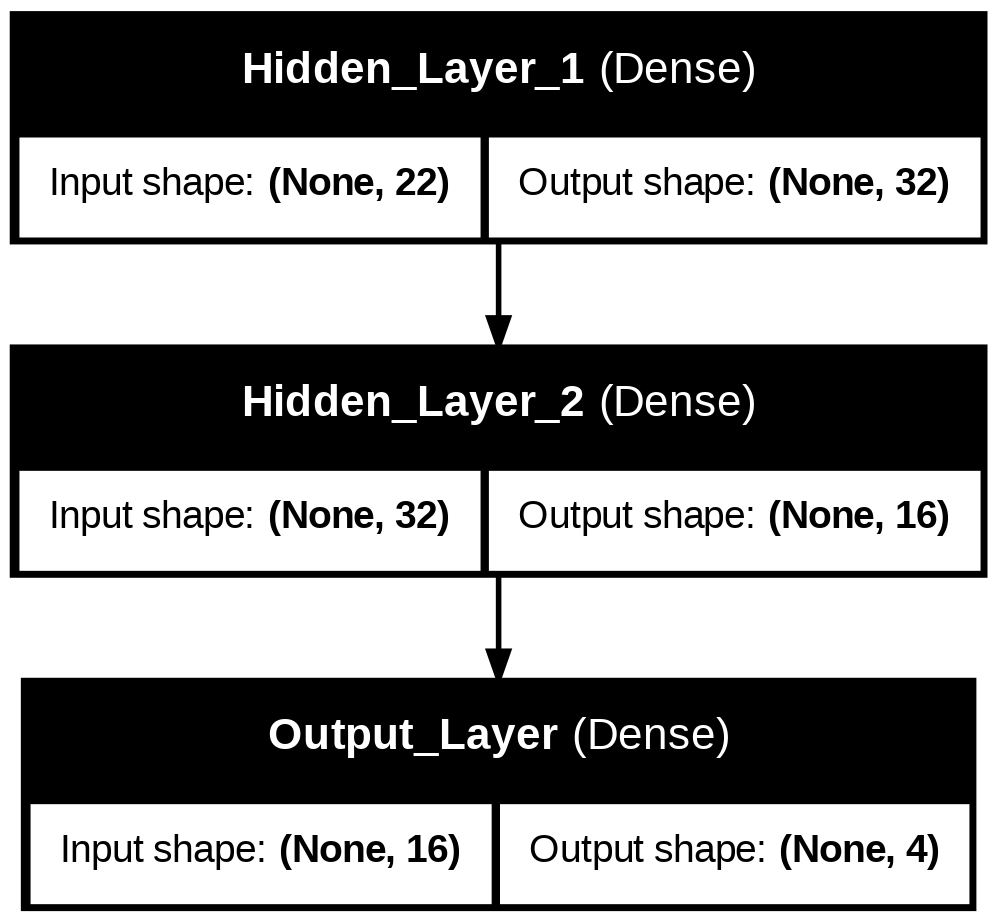

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

# Define your model
model = Sequential([
    Input(shape=(22,), name='Input_Layer'),  # 22 input features
    Dense(32, activation='relu', name='Hidden_Layer_1'),
    Dense(16, activation='relu', name='Hidden_Layer_2'),
    Dense(4, activation='softmax', name='Output_Layer')  # 4 classes (seasons)
])

# Save a visual of the model
plot_model(model, to_file="ufo_nn_model.png", show_shapes=True, show_layer_names=True)


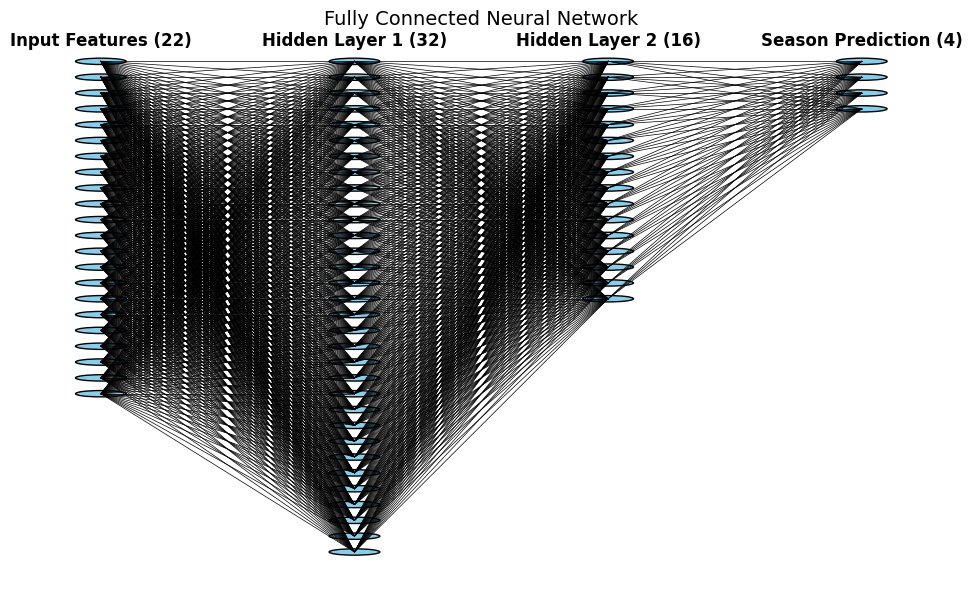

In [ ]:
import matplotlib.pyplot as plt

def draw_nn(layer_sizes, labels=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Calculate vertical spacing
    v_spacing = 1
    h_spacing = 2
    layer_count = len(layer_sizes)
    max_neurons = max(layer_sizes)

    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (max_neurons - 1) / 2
        for j in range(layer_size):
            x = i * h_spacing
            y = layer_top - j * v_spacing
            circle = plt.Circle((x, y), radius=0.2, fill=True, color="skyblue", ec="black")
            ax.add_patch(circle)

            # Draw connections
            if i > 0:
                prev_size = layer_sizes[i - 1]
                prev_top = v_spacing * (max_neurons - 1) / 2
                for k in range(prev_size):
                    x0 = (i - 1) * h_spacing
                    y0 = prev_top - k * v_spacing
                    ax.plot([x0, x], [y0, y], 'k-', lw=0.5)

        # Add layer labels
        if labels:
            label = labels[i]
            ax.text(x, layer_top + 1, f"{label} ({layer_size})", fontsize=12, ha='center', fontweight='bold')

    plt.title("Fully Connected Neural Network", fontsize=14)
    plt.tight_layout()
    plt.show()

# Layer sizes: Input (22), Hidden1 (32), Hidden2 (16), Output (4)
layer_sizes = [22, 32, 16, 4]
labels = ["Input Features", "Hidden Layer 1", "Hidden Layer 2", "Season Prediction"]
draw_nn(layer_sizes, labels)
